# Entendimento dos Dados

## Etapa 2 - Trabalho Extensionista

Apresentação de uma análise estatística e do planejamento da integração e limpeza dos dados.

**Integrantes:** Cristina Einsfeld, Heloysa Pelizon e Samuel Morales

### Proposta
O seguinte trabalho consiste em realizar análises estatísticas iniciais a fim do conhecimento dos dados selecionados para a proposta de projeto extensionista da cadeira Coleta, Preparação e Análise de Dados - 2024/1. A proposta citada se faz em reconhecer as motivações por trás da abstenção de voto no Brasil nas duas eleições presidenciais mais recentes (2022 e 2018), através de observação transversal dos dados de comparecimento e abstenção de voto fornecidos no site https://dadosabertos.tse.jus.br/group/comparecimento-e-abstencao do IBGE.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# Funções auxiliares

def visualizacao_metadados_socioculturais(df):
    for c in df.columns:
        if c[0:2] == 'CD':
            # print(c)
            # display(df[c].value_counts().to_frame())
            print(c + '\n\n')
            print(df[c].value_counts())
            print('\n\n')

### Análises Eleição 2018

In [3]:
# Carregamento do Dataframe com dados de Abstenção 2018
df_2018= pd.read_csv('./perfil_comparecimento_abstencao_2018_BRASIL.csv', encoding='latin-1', sep= ';')

In [4]:
# Visualização 10 primeiros exemplares
df_2018.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_IDIOMA_INDIGENA,CD_GRUPO_INDIGENA,DS_GRUPO_INDIGENA,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,1,0,1,0,0,0,0
1,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,6,6,0,0,0,0,0
2,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,5,4,1,0,0,0,0
3,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,1,1,0,1,0,0,0
4,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,1,0,1,0,0,0,0
5,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,8,5,3,0,0,0,0
6,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,2,2,0,0,0,0,0
7,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,2,2,0,1,0,0,0
8,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,14,8,6,0,0,0,0
9,27/10/2024,16:30:22,2018,1,PR,74004,GODOY MOREIRA,132,2,MASCULINO,...,#NE,-3,#NE,1,1,0,0,0,0,0


In [13]:
# Lista de features presentes no DataFrame
print(df_2018.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'SG_UF',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'CD_COR_RACA', 'DS_COR_RACA', 'CD_QUILOMBOLA', 'DS_QUILOMBOLA',
       'CD_INTERPRETE_LIBRAS', 'DS_INTERPRETE_LIBRAS', 'CD_IDENTIDADE_GENERO',
       'DS_IDENTIDADE_GENERO', 'CD_IDIOMA_INDIGENA', 'DS_IDIOMA_INDIGENA',
       'CD_GRUPO_INDIGENA', 'DS_GRUPO_INDIGENA', 'QT_APTOS',
       'QT_COMPARECIMENTO', 'QT_ABSTENCAO', 'QT_COMPARECIMENTO_DEFICIENCIA',
       'QT_ABSTENCAO_DEFICIENCIA', 'QT_COMPARECIMENTO_TTE',
       'QT_ABSTENCAO_TTE'],
      dtype='object')


In [8]:
# Visualização de frequência de categorias em cada feature socio-cultural
visualizacao_metadados_socioculturais(df_2018)

CD_MUNICIPIO


CD_MUNICIPIO
71072    136090
60011    120892
41238     42558
13897     41404
97012     38724
          ...  
38920         4
29963         4
99406         4
99350         2
99422         2
Name: count, Length: 5741, dtype: int64



CD_GENERO


CD_GENERO
4    4407380
2    3906304
0      63998
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    2775104
3    2488764
9    1166108
5    1060620
7     784672
0     102414
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
 5559    709440
 5054    703400
 6064    684574
 4549    648434
 6569    625046
 4044    610580
 3539    562910
 7074    542534
 3034    488474
 7579    453164
 2529    407534
 8084    363312
 2124    310778
 8589    271158
 9094    193394
 2000    179766
 1900    160538
 1800    139074
 9599    112742
 1700    100464
 1600     63974
 9999     40834
-3         5558
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    1441354
6    1187240
2    1184680
4    102

#### Redução escopo de análise: Estado do Rio Grande do Sul
Durante o conhecimento dos dados e seu entendimento, o grupo chegou a decisão de diminuir a dimencionalidade dos dados e realizar uma filtragem dos mesmos para um escopo estadual, mais especificamente, o estado do Rio Grande do Sul. Também, foi adicionada uma coluna que identifica a cidade do exemplar como parte da região metropolitana do estado ou não (0 ou 1).

In [7]:
regiao_metropolitana = [
    "ALVORADA", "ARARICÁ", "CACHOEIRINHA", "CAMPO BOM", "CANOAS", "CAPELA DE SANTANA", 
    "DOIS IRMÃOS", "ELDORADO DO SUL", "ESTÂNCIA VELHA", "ESTEIO", "GLORINHA", "GRAVATAÍ", 
    "GUAÍBA", "IVOTI", "NOVA HARTZ", "NOVA SANTA RITA", "PORTÃO", "SANTO ANTÔNIO DA PATRULHA", 
    "SÃO LEOPOLDO", "SAPIRANGA", "SAPUCAIA DO SUL", "TAQUARA", "TRIUNFO", "VIAMÃO", "PORTO ALEGRE"
]

In [8]:
# Redução do Dataframe para apenas cidades do estado do RS
df_2018_novo = df_2018[df_2018['SG_UF'] == 'RS']

# Filtragem de Dados do Dataframe com retirada de exemplares com valores inválidos
col = [coluna for coluna in df_2018_novo.columns if coluna[0:2] == 'CD']
df_2018_novo = df_2018_novo[~df_2018_novo[col].isin([0, -3, -1]).any(axis=1)]

# Redução de Dimensionalidade do Dataframe com exclusão de colunas desnecessárias
df_2018_novo = df_2018_novo.drop(columns=[
    'CD_COR_RACA', 'DS_COR_RACA', 'CD_QUILOMBOLA', 'DS_QUILOMBOLA',
    'CD_INTERPRETE_LIBRAS', 'DS_INTERPRETE_LIBRAS', 'CD_IDENTIDADE_GENERO',
    'DS_IDENTIDADE_GENERO', 'CD_IDIOMA_INDIGENA', 'DS_IDIOMA_INDIGENA',
    'CD_GRUPO_INDIGENA', 'DS_GRUPO_INDIGENA', 'QT_APTOS',
    'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
    'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE',
    'DT_GERACAO', 'HH_GERACAO'
])

# Nova dimensão do Dataframe
print('Nova Quantidade de Exemplares: ' + str(df_2018_novo.size))

# Visualização dos 10 primeiros exemplares do no Dataframe
df_2018_novo.head(10)

Nova Quantidade de Exemplares: 0


,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_COMPARECIMENTO,QT_ABSTENCAO


In [11]:
# Visualização de frequência de categorias em cada feature socio-cultural Dataframe RS
visualizacao_metadados_socioculturais(df_2018)

CD_MUNICIPIO


CD_MUNICIPIO
71072    136090
60011    120892
41238     42558
13897     41404
97012     38724
          ...  
38920         4
29963         4
99406         4
99350         2
99422         2
Name: count, Length: 5741, dtype: int64



CD_GENERO


CD_GENERO
4    4407380
2    3906304
0      63998
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    2775104
3    2488764
9    1166108
5    1060620
7     784672
0     102414
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
 5559    709440
 5054    703400
 6064    684574
 4549    648434
 6569    625046
 4044    610580
 3539    562910
 7074    542534
 3034    488474
 7579    453164
 2529    407534
 8084    363312
 2124    310778
 8589    271158
 9094    193394
 2000    179766
 1900    160538
 1800    139074
 9599    112742
 1700    100464
 1600     63974
 9999     40834
-3         5558
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    1441354
6    1187240
2    1184680
4    102

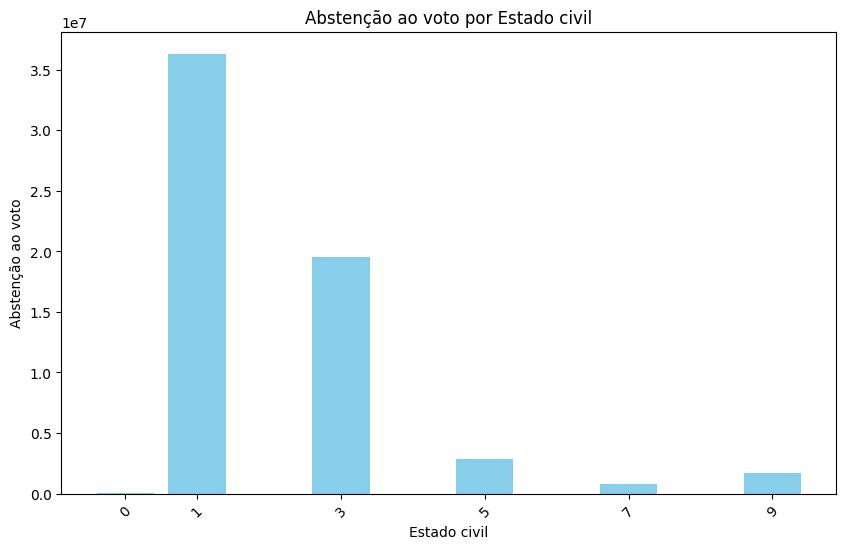

In [14]:
df_2018_agrupado = df_2018.groupby('CD_ESTADO_CIVIL')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_ESTADO_CIVIL'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por Estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

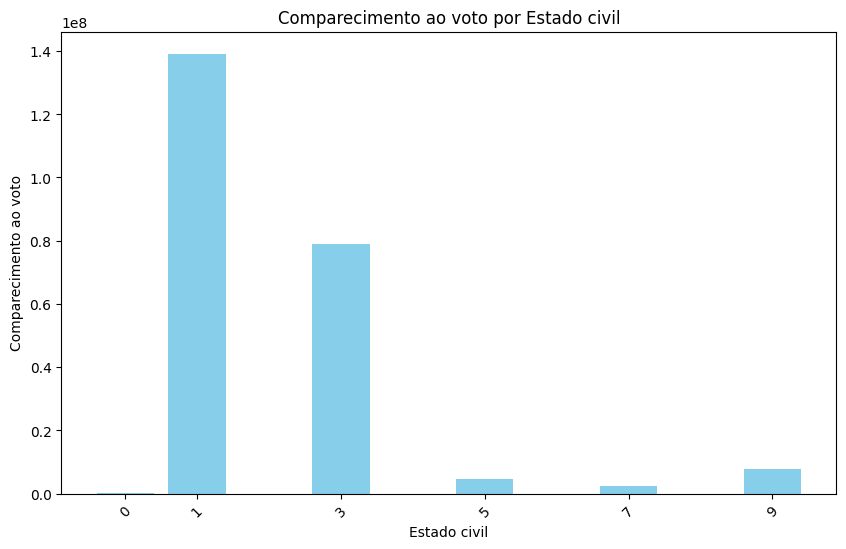

In [15]:
df_2018_agrupado = df_2018.groupby('CD_ESTADO_CIVIL')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_ESTADO_CIVIL'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por Estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

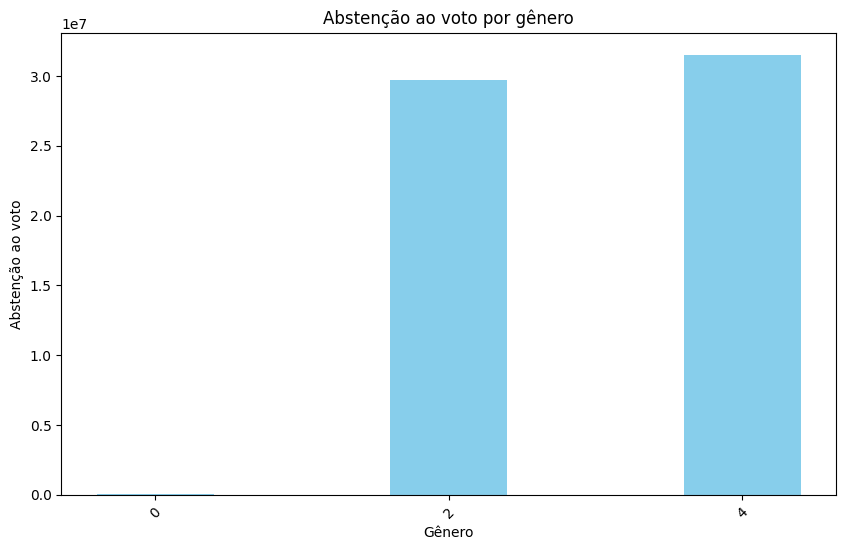

In [16]:
df_2018_agrupado = df_2018.groupby('CD_GENERO')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GENERO'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)

# Exibindo o gráfico
plt.show()

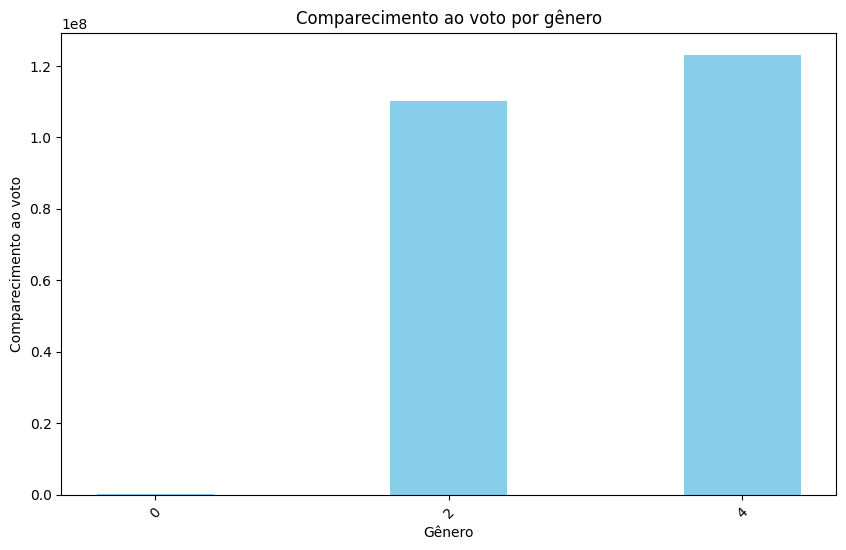

In [17]:
df_2018_agrupado = df_2018.groupby('CD_GENERO')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GENERO'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)

# Exibindo o gráfico
plt.show()

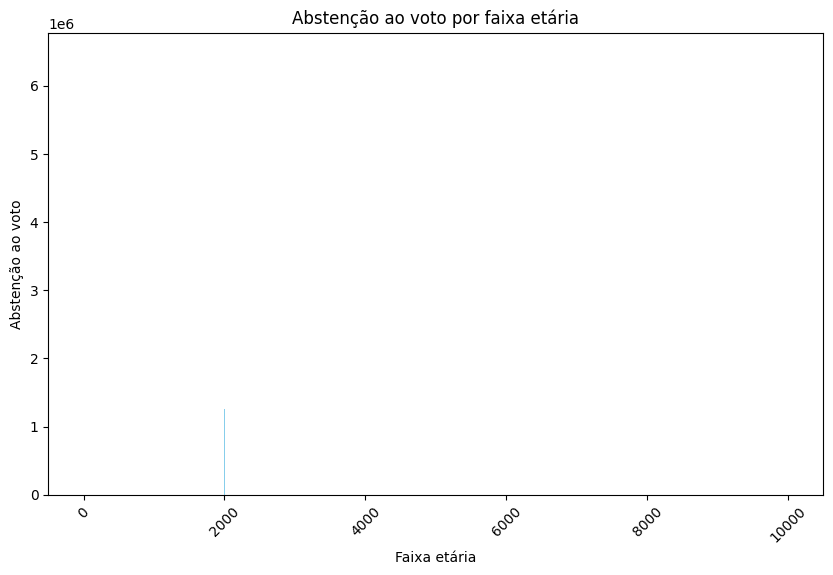

In [16]:
df_2018_agrupado = df_2018.groupby('CD_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_FAIXA_ETARIA'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

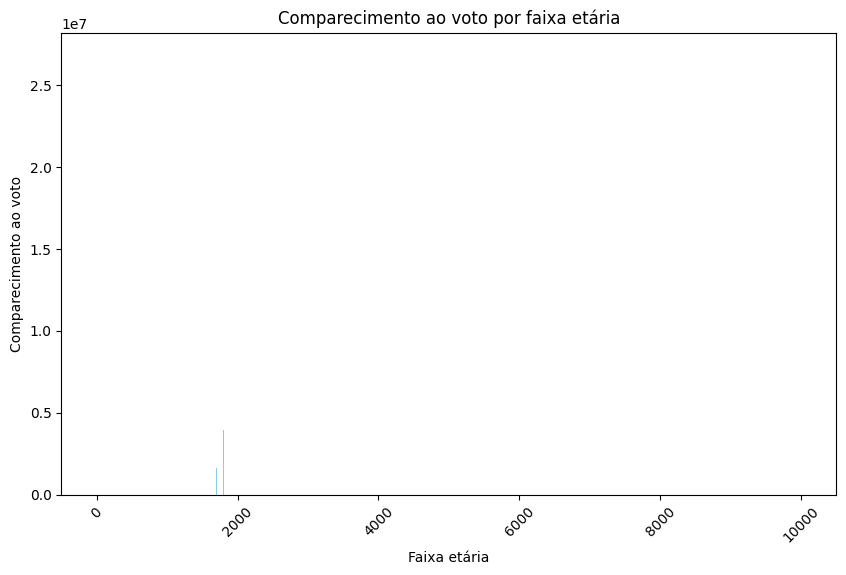

In [17]:
df_2018_agrupado = df_2018.groupby('CD_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_FAIXA_ETARIA'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

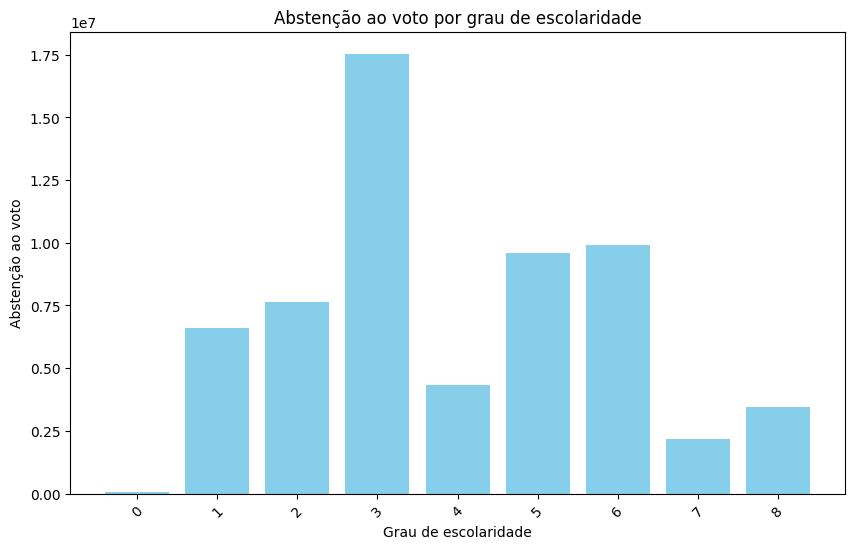

In [18]:
df_2018_agrupado = df_2018.groupby('CD_GRAU_ESCOLARIDADE')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GRAU_ESCOLARIDADE'], df_2018_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)

# Exibindo o gráfico
plt.show()

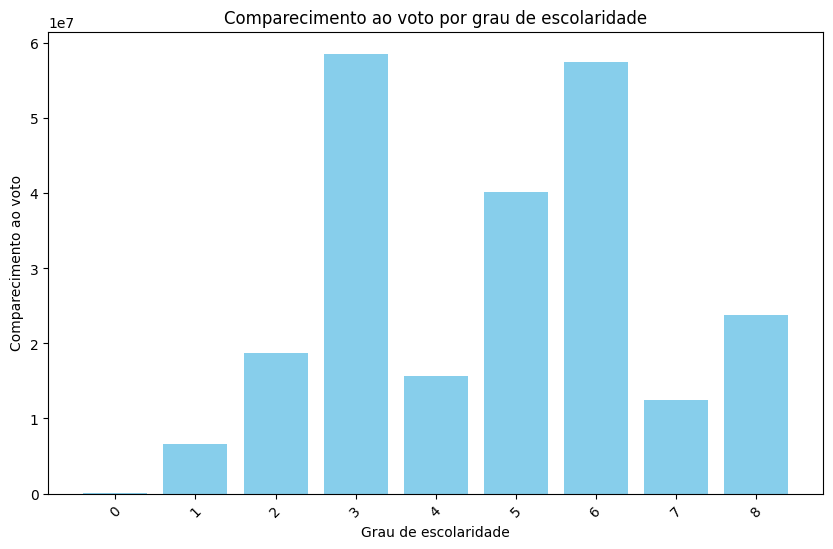

In [19]:
df_2018_agrupado = df_2018.groupby('CD_GRAU_ESCOLARIDADE')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2018_agrupado['CD_GRAU_ESCOLARIDADE'], df_2018_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)

# Exibindo o gráfico
plt.show()

### Análises Eleição 2022

In [20]:
# Carregamento do Dataframe com dados de Abstenção 2022
df_2022= pd.read_csv('./perfil_comparecimento_abstencao_2022.csv', encoding='latin-1', sep= ';')

In [21]:
# Visualização 10 primeiros exemplares
df_2022.head(10)# Lista de features presentes no DataFrame

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,85 a 89 anos,8,SUPERIOR COMPLETO,32,16,16,0,0,0,0
1,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,95 a 99 anos,1,ANALFABETO,9,0,9,0,0,0,0
2,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,35 a 39 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,1,0,0,0,0
3,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0,0,0,0
4,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,55 a 59 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
5,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,16,10,6,0,0,0,0
6,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,3,1,2,0,0,0,0
7,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,28,21,7,0,1,0,0
8,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,1,ANALFABETO,1,0,1,0,0,0,0
9,09/11/2022,15:22:04,2022,2,SP,61794,ASSIS,15,2,MASCULINO,...,80 a 84 anos,2,LÊ E ESCREVE,4,2,2,0,0,0,0


In [22]:
# Lista de features presentes no DataFrame
print(df_2022.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'SG_UF',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCAO',
       'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
       'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE'],
      dtype='object')


In [23]:
# Visualização de frequência de categorias em cada feature socio-cultural
visualizacao_metadados_socioculturais(df_2022)

CD_MUNICIPIO


CD_MUNICIPIO
71072    143084
60011    127190
41238     43652
13897     41852
97012     40844
          ...  
99350         2
99384         2
99198         2
99252         2
99147         2
Name: count, Length: 5751, dtype: int64



CD_GENERO


CD_GENERO
4    4625042
2    4119324
0      41372
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    2922052
3    2515178
9    1316074
5    1153352
7     815560
0      63522
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
 5559    723716
 6064    714682
 5054    688460
 6569    677722
 4549    652644
 4044    613980
 7074    607708
 3539    548186
 7579    513938
 3034    472454
 8084    418314
 2529    395884
 8589    317434
 2124    286172
 9094    226882
 2000    168796
 1900    160942
 9599    151254
 1800    148314
 1700    114236
 9999     90654
 1600     89498
-3         3868
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    1476472
6    1290434
2    1185466
4    108

In [24]:
regiao_metropolitana = [
    "ALVORADA", "ARARICÁ", "CACHOEIRINHA", "CAMPO BOM", "CANOAS", "CAPELA DE SANTANA", 
    "DOIS IRMÃOS", "ELDORADO DO SUL", "ESTÂNCIA VELHA", "ESTEIO", "GLORINHA", "GRAVATAÍ", 
    "GUAÍBA", "IVOTI", "NOVA HARTZ", "NOVA SANTA RITA", "PORTÃO", "SANTO ANTÔNIO DA PATRULHA", 
    "SÃO LEOPOLDO", "SAPIRANGA", "SAPUCAIA DO SUL", "TAQUARA", "TRIUNFO", "VIAMÃO", "PORTO ALEGRE"
]

In [25]:
# Redução do Dataframe para apenas cidades do estado do RS
df_2022_novo= df_2022[df_2022['SG_UF'] == 'RS' ]

# Filtragem de Dados do Dataframe com retirada de exemplares com valores inválidos
col = [coluna for coluna in df_2022_novo.columns if coluna[0:2] == 'CD']
df_2022_novo = df_2022_novo[~df_2022_novo[col].isin([0,-3,-1]).any(axis=1)]

# Redução de Dimensionalidade do Dataframe com exclusão de colunas desnecessárias
df_2022_novo = df_2022_novo.drop(columns=['DT_GERACAO', 'HH_GERACAO','QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
       'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE'])

# Nova dimensão do Dataframe
print( 'Nova Quantidade de Exemplares: ' + str(df_2022_novo.size))

# Visualização dos 10 primeiros exemplares do no Dataframe
df_2022_novo.head(10)

Nova Quantidade de Exemplares: 10992336


,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO
92,2022,1,RS,89591,VERANÓPOLIS,88,2,MASCULINO,9,DIVORCIADO,8084,80 a 84 anos,8,SUPERIOR COMPLETO,1,1,0
93,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1700,17 anos,5,ENSINO MÉDIO INCOMPLETO,30,22,8
94,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,1800,18 anos,6,ENSINO MÉDIO COMPLETO,51,47,4
95,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,57,47,10
96,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,245,222,23
97,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,8589,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,5,2,3
98,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,1,SOLTEIRO,8589,85 a 89 anos,8,SUPERIOR COMPLETO,1,1,0
99,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,3,CASADO,6569,65 a 69 anos,4,ENSINO FUNDAMENTAL COMPLETO,46,46,0
100,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,3,CASADO,6569,65 a 69 anos,6,ENSINO MÉDIO COMPLETO,79,78,1
101,2022,1,RS,89591,VERANÓPOLIS,88,4,FEMININO,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,38,33,5


In [26]:
# Visualização de frequência de categorias em cada feature socio-cultural Dataframe RS
visualizacao_metadados_socioculturais(df_2022_novo)

CD_MUNICIPIO


CD_MUNICIPIO
88013    22914
85995     6404
87912     6298
88412     4552
88773     4490
         ...  
89184      598
88048      594
89168      580
86525      578
85820      576
Name: count, Length: 497, dtype: int64



CD_GENERO


CD_GENERO
4    343462
2    303146
Name: count, dtype: int64



CD_ESTADO_CIVIL


CD_ESTADO_CIVIL
1    213168
3    188658
9     87402
5     84360
7     73020
Name: count, dtype: int64



CD_FAIXA_ETARIA


CD_FAIXA_ETARIA
6064    55274
5559    55028
6569    52810
5054    51716
4549    48850
7074    48168
4044    45816
7579    40484
3539    39686
3034    33458
8084    32066
2529    27284
8589    23654
2124    19100
9094    15056
2000    11370
1900    10932
1800    10122
9599     8614
1700     6988
1600     5668
9999     4464
Name: count, dtype: int64



CD_GRAU_ESCOLARIDADE


CD_GRAU_ESCOLARIDADE
3    121868
6     97556
4     90736
5     79436
8     74296
2     67524
7     58856
1     56336
Name: count, dtype: int64





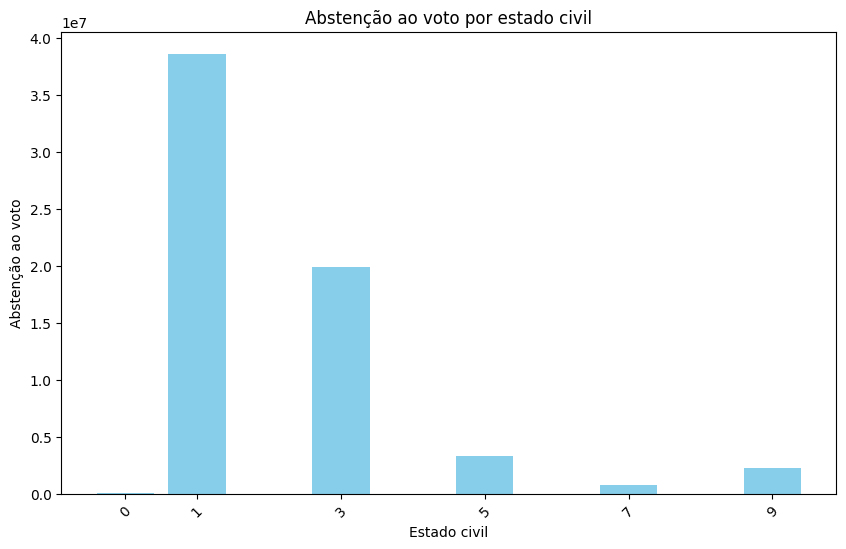

In [27]:
df_2022_agrupado = df_2022.groupby('CD_ESTADO_CIVIL')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_ESTADO_CIVIL'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)

# Exibindo o gráfico
plt.show()

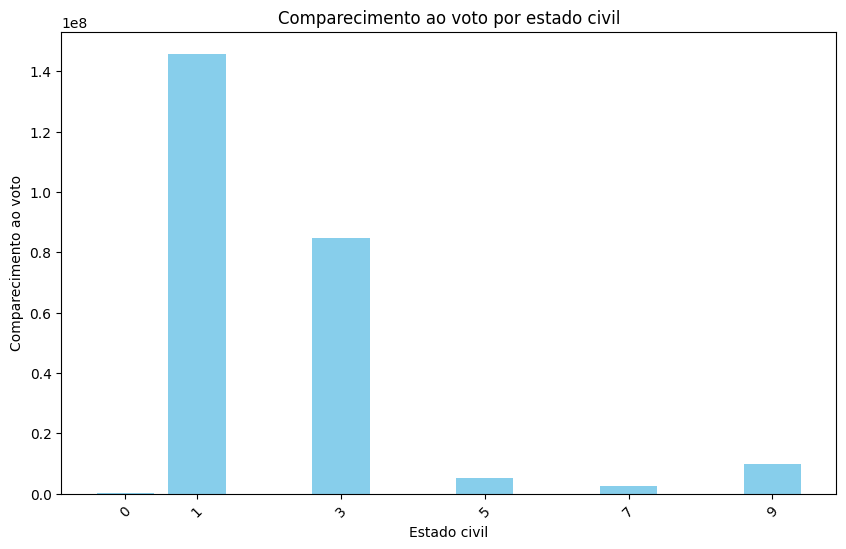

In [28]:
df_2022_agrupado = df_2022.groupby('CD_ESTADO_CIVIL')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_ESTADO_CIVIL'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Estado civil')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por estado civil')
plt.xticks(ticks=[0, 1, 3, 5, 7, 9], rotation=45)
# Exibindo o gráfico
plt.show()

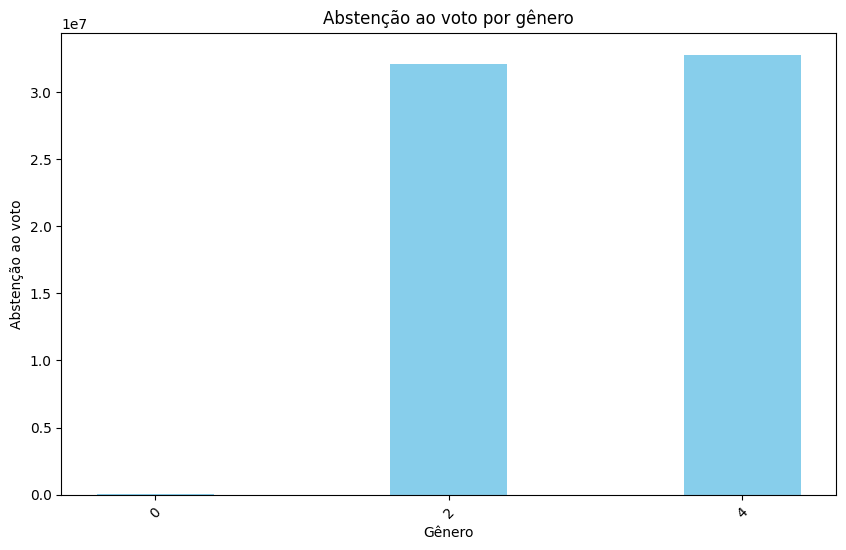

In [29]:
df_2022_agrupado = df_2022.groupby('CD_GENERO')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GENERO'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)
# Exibindo o gráfico
plt.show()

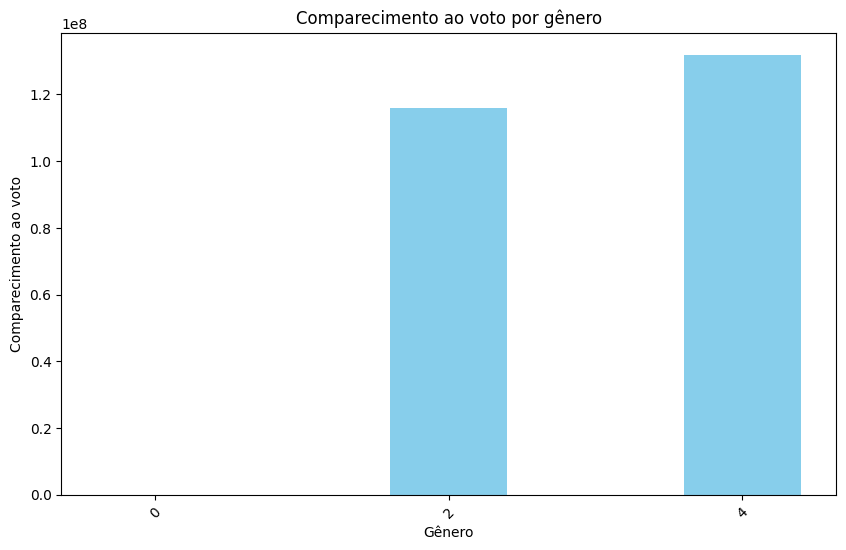

In [30]:
df_2022_agrupado = df_2022.groupby('CD_GENERO')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GENERO'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Gênero')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por gênero')
plt.xticks(ticks=[0, 2, 4], rotation=45)
# Exibindo o gráfico
plt.show()

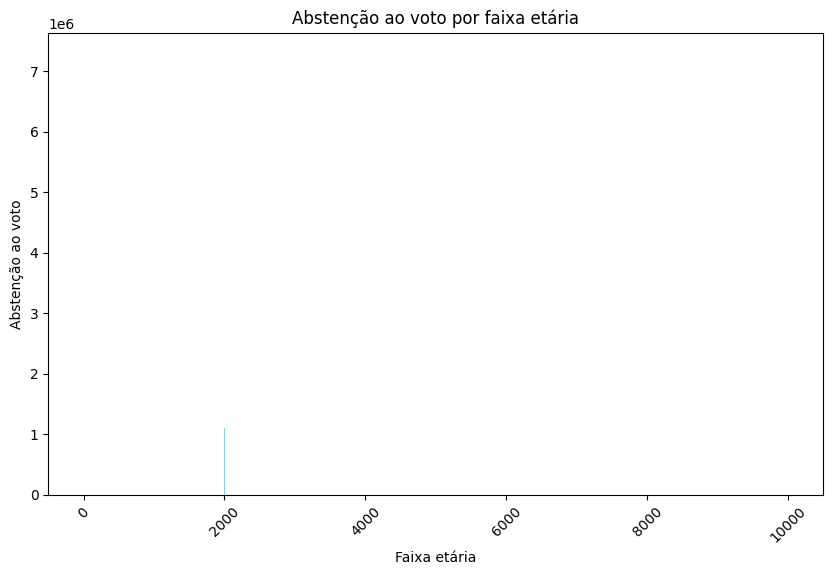

In [36]:
df_2022_agrupado = df_2022.groupby('CD_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_FAIXA_ETARIA'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

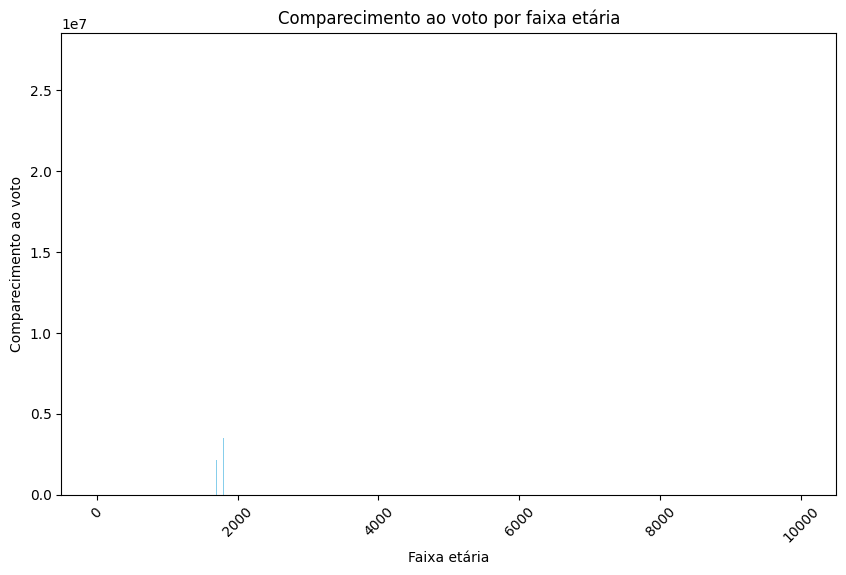

In [35]:
df_2022_agrupado = df_2022.groupby('CD_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_FAIXA_ETARIA'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Faixa etária')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por faixa etária')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

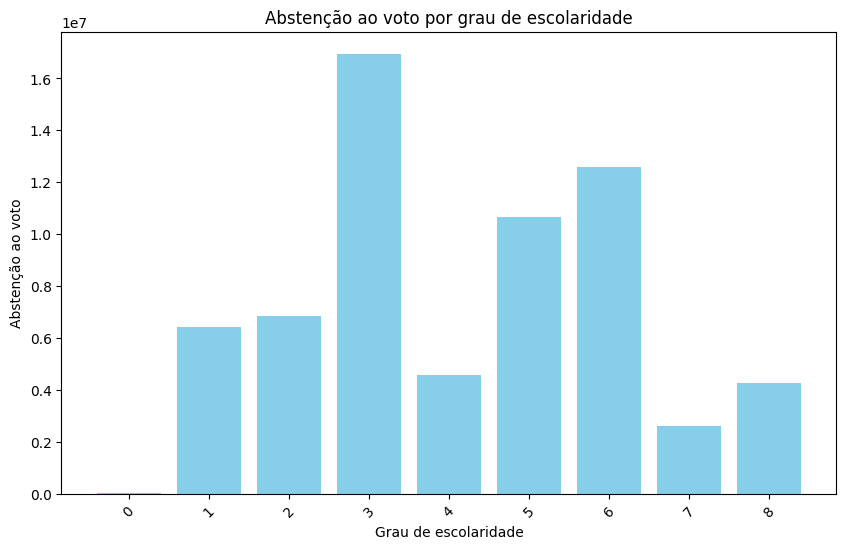

In [31]:
df_2022_agrupado = df_2022.groupby('CD_GRAU_ESCOLARIDADE')['QT_ABSTENCAO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GRAU_ESCOLARIDADE'], df_2022_agrupado['QT_ABSTENCAO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Abstenção ao voto')
plt.title('Abstenção ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)
# Exibindo o gráfico
plt.show()

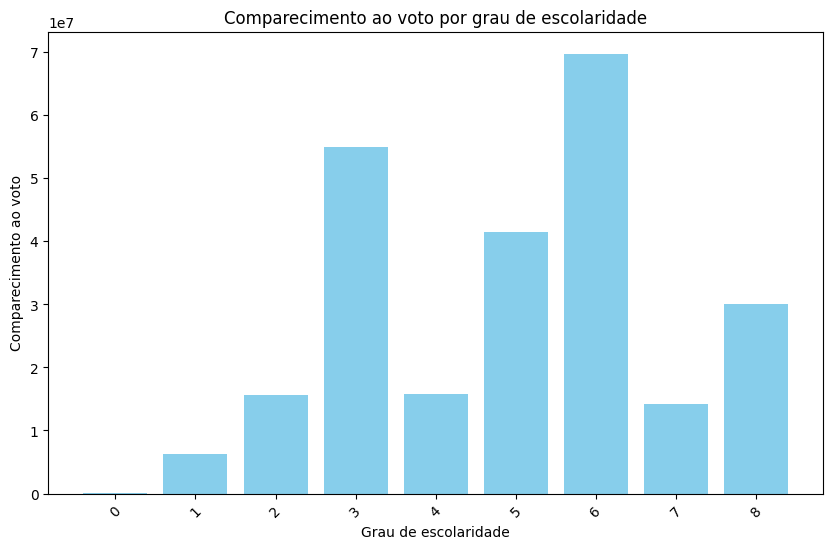

In [32]:
df_2022_agrupado = df_2022.groupby('CD_GRAU_ESCOLARIDADE')['QT_COMPARECIMENTO'].sum().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_2022_agrupado['CD_GRAU_ESCOLARIDADE'], df_2022_agrupado['QT_COMPARECIMENTO'], color='skyblue')

# Personalização do gráfico
plt.xlabel('Grau de escolaridade')
plt.ylabel('Comparecimento ao voto')
plt.title('Comparecimento ao voto por grau de escolaridade')
plt.xticks(ticks=[0, 1, 2, 3 , 4 , 5, 6, 7, 8], rotation=45)
# Exibindo o gráfico
plt.show()